data fetch and normalization

In [1]:
# Import library keras dan lain-lain
import numpy as np # For matrix math
from numpy import loadtxt
from keras.models import Sequential
import matplotlib.pyplot as plt # For plotting
import keras
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Activation
from IPython.display import clear_output
import os
PATH_TO_DATA = os.getcwd() # get current directory
PATH_TO_DATA = PATH_TO_DATA + '/data-to-be-loaded.csv' # path to data
print("Cek apakah data benar ada pada path tersebut")
print(PATH_TO_DATA) # print path to data to check if it is correct

Cek apakah data benar ada pada path tersebut
c:\Users\Lenovo\Desktop\Kuliah\SEMESTER 4\KECERDASAN BUATAN\UAS\prediksi-pengangguran-keras/data-to-be-loaded.csv


In [2]:
# Define function untuk normalisasi data
def normalisasi(x):
    a = np.max(x)
    b = np.min(x)
    for i in x:
        hasil_normalisasi = (0.8 * (x - b))/(a-b) + 0.1
    return hasil_normalisasi

<h1>Import Dulu Datanya<h1>

In [3]:
# load data latih
# Data Tingkat Pengangguran Terbuka (TPT) mulai Tahun 1997 
# sampai dengan Tahun 2020

TPT = loadtxt(PATH_TO_DATA, delimiter=',')
TPT_normal = normalisasi(TPT)

TPT_Target = TPT[:,16]
TPT_Target_Uji = TPT[:,17]

# DATA PELATIHAN =================================
# Data dibagi menjadi 10 variabel input (X) dan 1 variabel output (Y)
# Input : mulai tahun 1987 sampai tahun 2021

X = TPT_normal[:,0:16]

# Output : data TPT tahun 2020 dan 2021

Y = TPT_normal[:,16]

# DATA UJI PREDIKSI=================================
# Geser  dua tahun ke depan
# Input : mulai tahun 1987 sampai tahun 2021
# Untuk memprediksi TPT Tahun 2022 dan 2023

X1 = TPT_normal[:,1:17]

# Urut tahun, menggantikan indeks dari 0 s.d 1
urut = [1,
       2
       ]

In [4]:
print(TPT)

[[ 2.62   2.81   2.62   2.79   4.87   5.46   6.08   9.06   9.86  10.36
   8.43   7.28   6.25   5.82   5.555  5.199  6.005  5.845]
 [ 2.85   2.55   2.74   4.36   4.69   6.36   8.1    9.67  10.76   9.43
   8.005  7.22   6.025  5.994  5.415  5.105  6.375  5.385]]


In [5]:
print(TPT_normal)

[[0.10682095 0.12533496 0.10682095 0.12338611 0.32606577 0.38355664
  0.44397077 0.73434836 0.81230207 0.86102314 0.67295981 0.56090134
  0.46053593 0.41863581 0.39281364 0.35812424 0.43666261 0.42107186]
 [0.12923264 0.1        0.11851401 0.27637028 0.30852619 0.47125457
  0.6408039  0.79378806 0.9        0.77040195 0.63154689 0.55505481
  0.43861145 0.43559074 0.37917174 0.34896468 0.4727162  0.37624848]]


In [6]:
print("Data Input:", X)
print("Data Output:", Y)

Data Input: [[0.10682095 0.12533496 0.10682095 0.12338611 0.32606577 0.38355664
  0.44397077 0.73434836 0.81230207 0.86102314 0.67295981 0.56090134
  0.46053593 0.41863581 0.39281364 0.35812424]
 [0.12923264 0.1        0.11851401 0.27637028 0.30852619 0.47125457
  0.6408039  0.79378806 0.9        0.77040195 0.63154689 0.55505481
  0.43861145 0.43559074 0.37917174 0.34896468]]
Data Output: [0.43666261 0.4727162 ]


In [7]:
baris, kolom = TPT.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 18


In [8]:
baris, kolom = TPT_normal.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 18


<h3>Masukkan X

In [9]:
baris, kolom = X.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 16


<h3>Definisi model keras

In [10]:
# Mendefinisikan model keras
model = Sequential()
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Lenovo\Desktop\Kuliah\SEMESTER 4\KECERDASAN BUATAN\UAS\prediksi-pengangguran-keras\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Proses kompilasi (pelatihan) Deep Learning
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [12]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show();
        
plot_losses = PlotLosses()

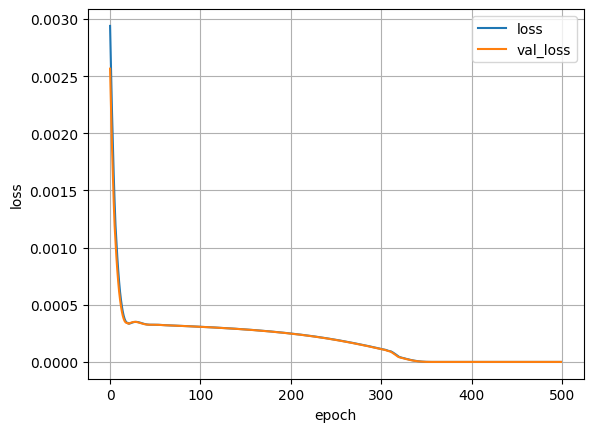

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 5.0182e-14 - mean_squared_error: 5.0182e-14 - val_loss: 1.8208e-14 - val_mean_squared_error: 1.8208e-14


In [13]:
model.fit(X, Y,
          epochs=500,
          validation_data=(X, Y),
          callbacks=[plot_losses],
          verbose=1)

In [14]:
# evaluate the keras model
# Evalusi hasil proses pelatihan Deep Learning
# Hitung akurasi hasil pelatihan dalam bentuk Prosentase Keberhasilan
# Prosentase Keberhasilan = 100 - MAPE

#_, MAPE_pelatihan = model.evaluate(X_normal, Y_normal, batch_size=1)

_, MSE = model.evaluate(X, Y, batch_size=1)

#print('Prosentase_keberhasilan: %.2f' % (100-MAPE_pelatihan))

print('MSE : %.9f' % (MSE))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9540e-14 - mean_squared_error: 1.9540e-14 
MSE : 0.000000000


In [15]:
# menjalankan fungsi prediksi
y_pred = model.predict(X)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[0.43666276]
 [0.4727161 ]]


In [16]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(TPT)
b = np.min(TPT)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_prediksi = (((y_pred - 0.1)*(a - b))/0.8) + b

print("y_prediksi =", y_prediksi)

y_prediksi = [[6.0050015]
 [6.374999 ]]


In [17]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan1 = ['2020',
       '2021'
       ]

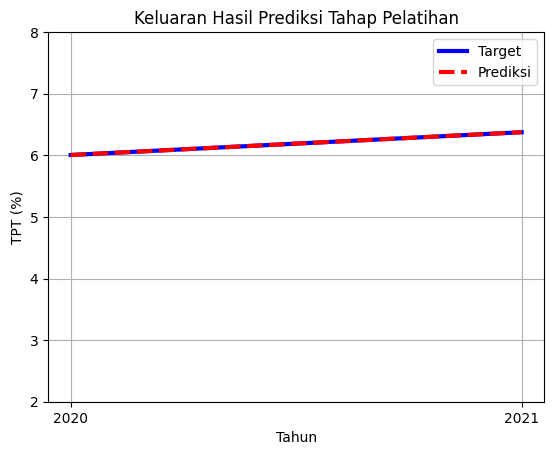

In [18]:
# Plot Keluaran Hasil Prediksi Tahap Pelatihan

plt.title('Keluaran Hasil Prediksi Tahap Pelatihan')
plt.plot(urutan1, TPT_Target, '-b', label='Target',linewidth=3, markersize=12)
plt.plot(urutan1, y_prediksi, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((2,8))
plt.grid()

error [[-1.54495239e-06  9.53674316e-07]]


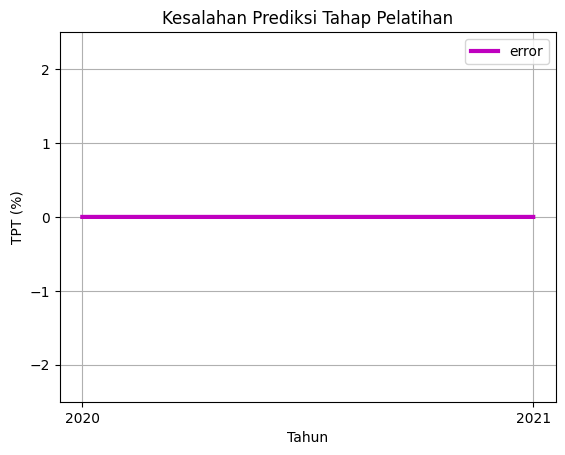

In [19]:
# Plot Kesalahan Prediksi

selisih = TPT_Target - y_prediksi.transpose()
plt.title('Kesalahan Prediksi Tahap Pelatihan')
plt.plot(urutan1, selisih.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((-2.5,2.5))
plt.grid()
print("error", selisih)

In [20]:
# Pengukuran kinerja Deep Learning

from sklearn.metrics import mean_squared_error
from math import sqrt
mse  = mean_squared_error(TPT_Target, y_prediksi)
rmse = sqrt(mse)
print("mse =",mse)
print("rmse =",rmse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(TPT_Target, y_prediksi)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 1.6481862987175638e-12
rmse = 1.2838170814869088e-06
MAPE = 2.9913635491814925
Persentase_keberhasilan = 97.00863645081851


<h1>Prediksi TPT</h1>
<h2>Tahap Uji</h2>

Input : mulai tahun 1987 sampai tahun 2021
Untuk memprediksi TPT di tahun 2022 dan 2023

In [21]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan2 = ['2022',
       '2023'
       ]

In [22]:
# Ujicoba prediksi
y_uji = model.predict(X1)
print('Hasil prediksi sebelum denormalisasi =', y_uji)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Hasil prediksi sebelum denormalisasi = [[0.48727012]
 [0.48958305]]


In [23]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(TPT)
b = np.min(TPT)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_pengujian = (((y_uji - 0.1)*(a - b))/0.8) + b

print("y_pengujian =", y_pengujian)

y_pengujian = [[6.5243597]
 [6.5480957]]


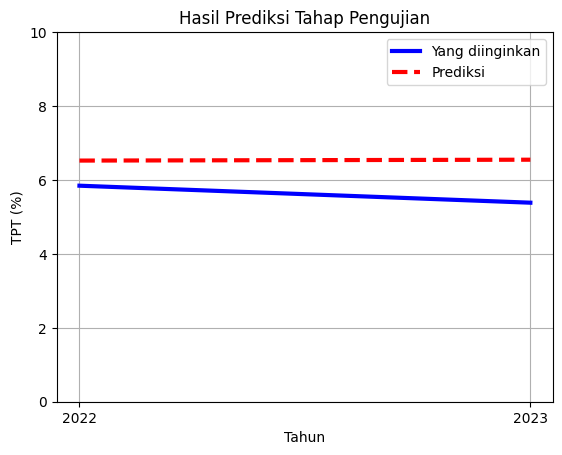

In [24]:
# Plot keluaran hasil prediksi Tahap Pengujian

plt.title('Hasil Prediksi Tahap Pengujian')
plt.plot(urutan2,  TPT_Target_Uji, '-b', label='Yang diinginkan',linewidth=3, markersize=12)
plt.plot(urutan2, y_pengujian, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((0,10))
plt.grid()

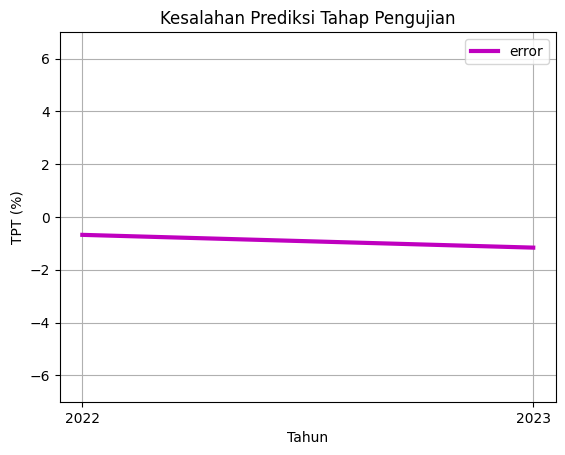

In [25]:
# Plot kesalahan prediksi Tahap Pengujian

selisih_pengujian = TPT_Target_Uji - y_pengujian.transpose()
plt.title('Kesalahan Prediksi Tahap Pengujian')
plt.plot(urutan2, selisih_pengujian.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((-7,7))
plt.grid()

In [26]:
# Pengukuran kinerja Deep Learning Tahap Pengujian

from sklearn.metrics import mean_squared_error
from math import sqrt
mse1  = mean_squared_error(TPT_Target_Uji, y_pengujian)
rmse1 = sqrt(mse1)
print("mse =",mse1)
print("rmse =",rmse1)

MAPE = mean_absolute_percentage_error(TPT_Target_Uji, y_pengujian)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 0.9071606103874987
rmse = 0.9524497941558383
MAPE = 16.602190931707682
Persentase_keberhasilan = 83.39780906829232
